In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\z004z92k\AppData\Local\Temp\ipykernel_5264\2408294749.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


# PREPROCESSING

In [2]:
dataset = pd.read_csv(r"C:\Users\z004z92k\Downloads\concrete\concrete_data.csv")
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
dataset.drop_duplicates(inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1005 non-null   float64
 1   Blast Furnace Slag  1005 non-null   float64
 2   Fly Ash             1005 non-null   float64
 3   Water               1005 non-null   float64
 4   Superplasticizer    1005 non-null   float64
 5   Coarse Aggregate    1005 non-null   float64
 6   Fine Aggregate      1005 non-null   float64
 7   Age                 1005 non-null   int64  
 8   Strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


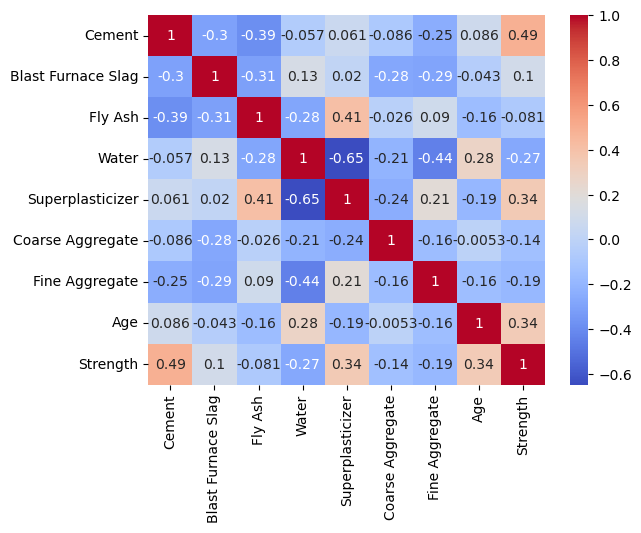

In [5]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [6]:
y = dataset['Strength'].values
dataset.drop(columns='Strength',axis=1,inplace=True)
x = dataset.values
print("Target range:", y.min(), "to", y.max())

Target range: 2.33 to 82.6


# Model Training

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Coefficient: {model.coef_}, Intercept: {model.intercept_}')

Mean Squared Error: 125.2456480505019
Coefficient: [12.11876104  8.43727247  5.43950487 -2.82785409  1.97079329  1.19898283
  1.66994542  6.89450368], Intercept: 35.06697761194028


In [11]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R² Score:", r2_score(y_test, y_test_pred))

Train RMSE: 10.001794718033253
Test RMSE: 11.191320210346136
R² Score: 0.5801703029028777


In [12]:
# Applying l2 regularizer to reduce the impact of multicollinearity
ridge = Ridge(alpha=0.01) #tried alpha value to 0.1 , 1
ridge.fit(x_train,y_train)
print("Ridge Test RMSE:", np.sqrt(mean_squared_error(y_test, ridge.predict(x_test))))

Ridge Test RMSE: 11.191337563824455


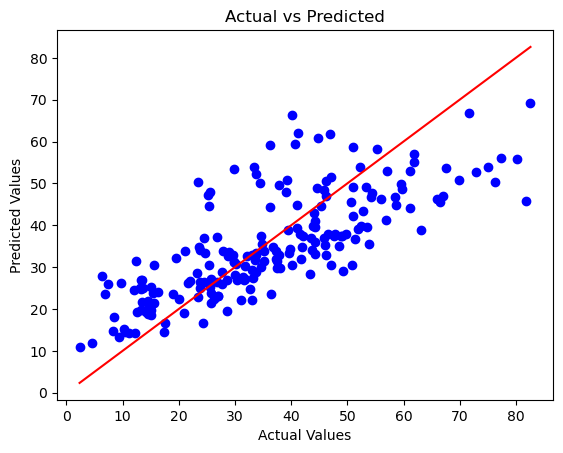

In [13]:
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Performing Polynomial Regresion because feature and target relationship is non-linear

In [14]:
poly = PolynomialFeatures(degree=3)  # Tried 2 and 3
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model.fit(x_train_poly, y_train)

LinearRegression()

In [15]:
y_train_pred_poly = model.predict(x_train_poly)
y_test_pred_poly = model.predict(x_test_poly)
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_poly)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_poly)))
print("R² Score:", r2_score(y_test, y_test_pred_poly))

Train RMSE: 4.396054255045657
Test RMSE: 5.956948437600115
R² Score: 0.8810517126745091


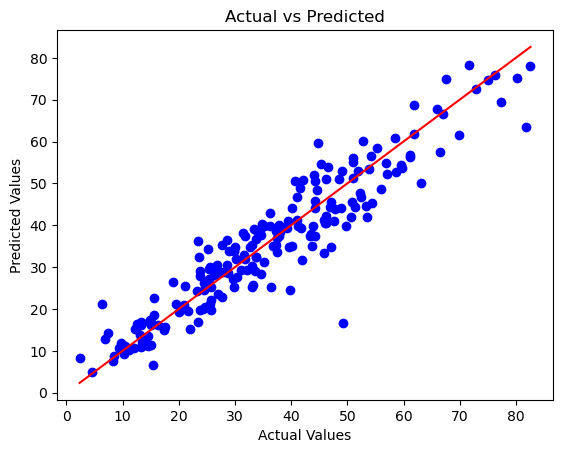

In [16]:
plt.scatter(y_test, y_test_pred_poly, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [17]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model,x_train,y_train,cv=5,scoring='neg_root_mean_squared_error')
    print(f"{name} RMSE: {-np.mean(scores):.4f}")

Ridge RMSE: 10.1518
Lasso RMSE: 10.7423
ElasticNet RMSE: 11.4788
RandomForest RMSE: 5.3569
GradientBoosting RMSE: 5.3522


In [18]:
import pickle


with open('concrete_content.pkl', 'wb') as file:
    pickle.dump(x,file)

with open('strength.pkl', 'wb') as file:
    pickle.dump(y,file)

In [32]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

# Evaluate Model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"R² Score: {r2_score(y_test, y_test_pred):.4f}")

Train RMSE: 9.8324
Test RMSE: 12.1394
R² Score: 0.5060


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
gbr = GradientBoostingRegressor(random_state=42)

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 300, 500],          # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],       # Step size
    'max_depth': [3, 5, 7],                   # Tree depth
    'min_samples_split': [2, 5, 10],              # Minimum samples to split
    'min_samples_leaf': [1, 3, 5],               # Minimum samples per leaf
    'subsample': [0.7, 0.9, 1.0],                  # Subsampling ratio
    'max_features': ['sqrt', 'log2', None]          # Feature selection
}

# Set Up Grid Search
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

# Fit Model
grid_search.fit(x_train, y_train)

# Best Parameters & Performance
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

# Evaluate on Test Data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(x_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Test RMSE:", test_rmse)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.9}
Best RMSE: 11.808086028257382
Test RMSE: 12.539141567329956


In [35]:
print("R² Score:", r2_score(y_test, y_test_pred))

R² Score: 0.47295691137341433
